In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 3.4 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/11.1 MB 4.4 MB/s eta 0:00:03
   ----------- ---------------------------- 3.1/11.1 MB 5.6 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.1 MB 5.6 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.1 MB 4.9 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.1 MB 4.7 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.1 MB 4.5 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.1 MB 3.8 MB/s eta 0:00:02
   ------------------------- -------------- 7.1/11.1 MB 3.7 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.1 MB 3.7 MB/s eta 0:00:02
   ----------------------------- ---------- 8.1/11.1 MB 3.5 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.1 MB 3.4 MB/s eta 0:00:01
   ---


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()

# Convert to a Pandas DataFrame for easier manipulation
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Map target integers to species names for better readability
data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows of the dataset
print(data.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [4]:
print(data.info())
print(data.describe())
print(data['species'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000      

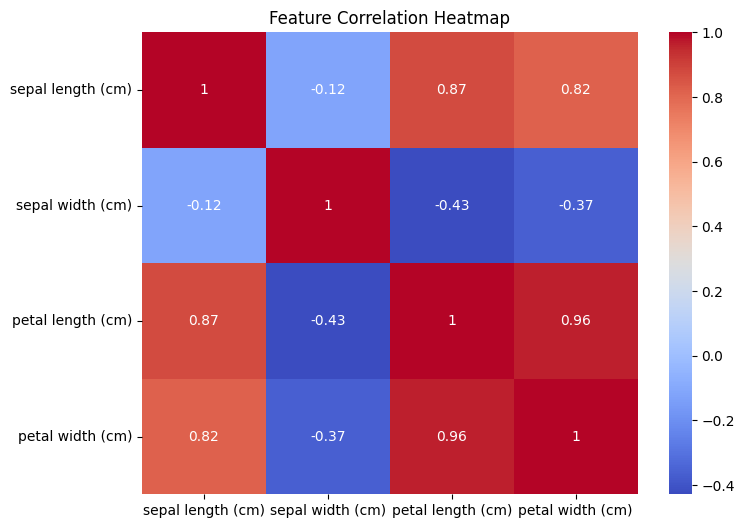

In [6]:
# Compute correlation matrix for only numeric columns
correlation_matrix = data.drop('species', axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
# Features and target variable
X = data.drop('species', axis=1)
y = data['species']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


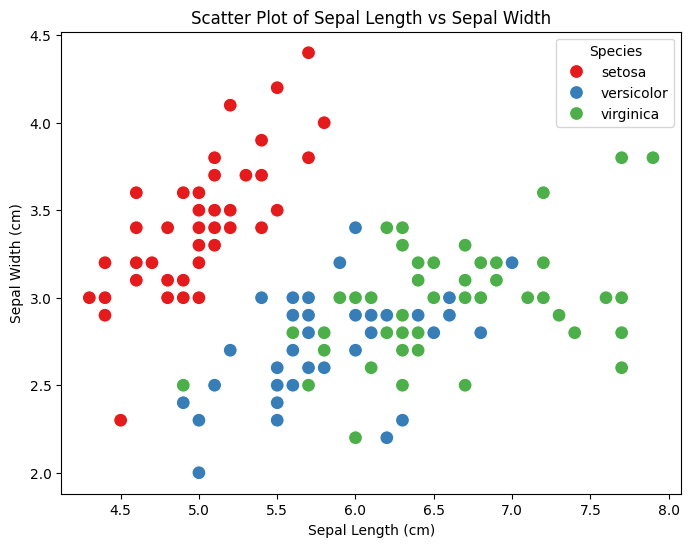

In [8]:
# Scatter plot for two features: sepal length vs sepal width
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=data,
    x='sepal length (cm)',  # Use exact column name
    y='sepal width (cm)',   # Use exact column name
    hue='species',
    palette='Set1',
    s=100  # Marker size
)
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



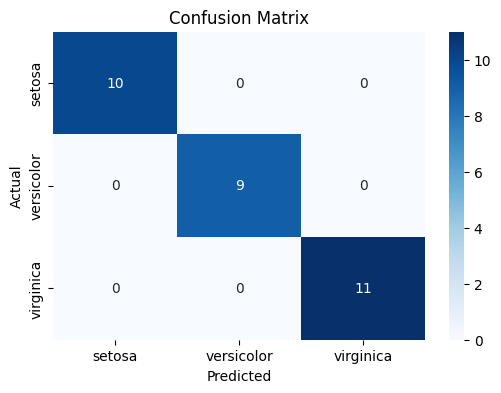

In [12]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [13]:
import joblib

# Save the model to a file
joblib.dump(model, 'iris_classifier.pkl')
print("Model saved as iris_classifier.pkl")


Model saved as iris_classifier.pkl


In [14]:
# Load the saved model
loaded_model = joblib.load('iris_classifier.pkl')

# Test with new data (example input)
sample_input = [[5.1, 3.5, 1.4, 0.2]]  # Example input for a Setosa flower

prediction = loaded_model.predict(sample_input)
print(f"Predicted species: {prediction[0]}")


Predicted species: setosa


c:\Users\sharm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
